In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ift6758.training import AdvancedModel
from sklearn.model_selection import train_test_split
import pickle
import pandas as pd

In [3]:
train_val = pd.read_pickle('../../notebooks/Milestone2/TrainValSets.pkl')
X_all = train_val.drop(['is_goal'], axis=1)
y_all = train_val['is_goal']

# Split into train val
X_train, X_val, y_train, y_val = train_test_split(X_all, y_all, test_size=0.3, random_state=42)

In [4]:
modelsDict = {
    'xgboost_distance-angle': AdvancedModel(pickle.load(open('../../train/xgboost_distance-angle/model.pkl', 'rb'))).get_pred_proba(X_val[['distance_goal', 'angle_shot']])
}

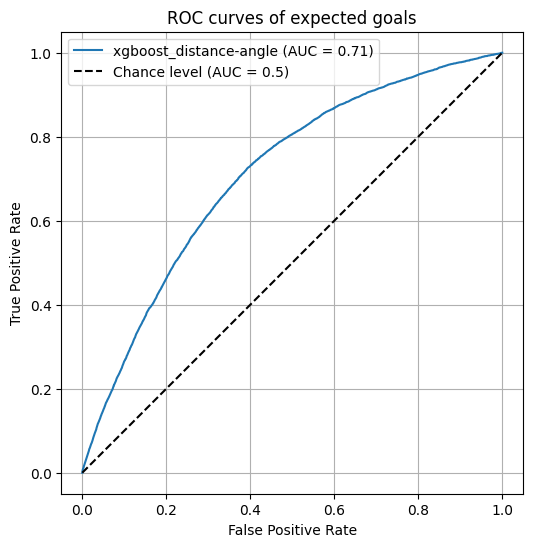

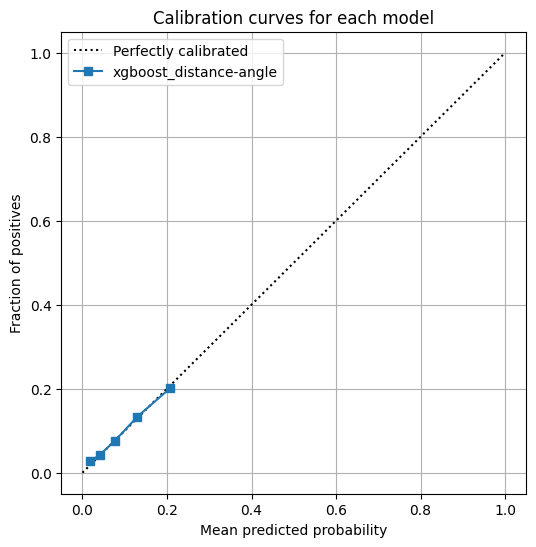

/Users/JJKaufman/DESS/IFT6758/IFT6758-A5-NHL/ift6758/training/plot.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_rate = df.groupby(centiles).is_goal.mean()


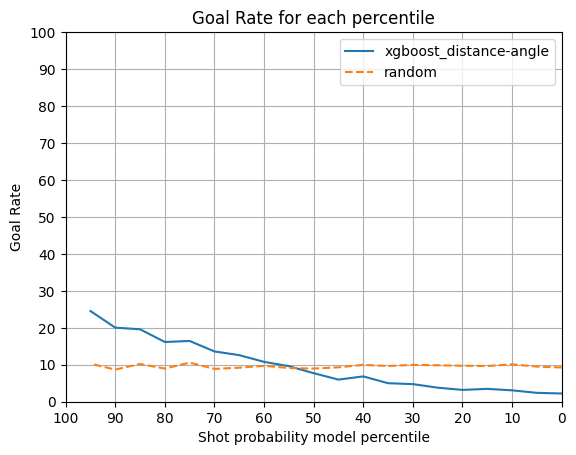

/Users/JJKaufman/DESS/IFT6758/IFT6758-A5-NHL/ift6758/training/plot.py:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goals = df.groupby(centiles).is_goal.sum()


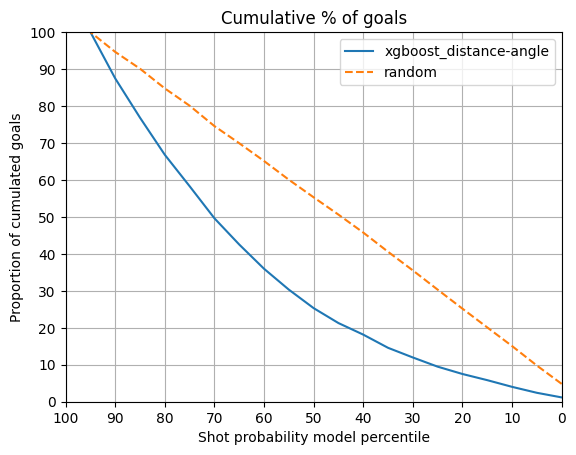

In [5]:
from ift6758.training.plot import plot_all
plot_all(modelsDict, y_val)